In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import kurtosis, skew
from scipy.stats import norm

In [3]:
df = pd.read_excel("economicBackground.xlsx")
df

,Unnamed: 0,Country Name,Country Code,Region,IncomeGroup,Year,Life Expectancy World Bank,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Sanitation,Injuries,Communicable,NonCommunicable
0,0,Afghanistan,AFG,South Asia,Low income,2001,56.308,47.8,730.000000,5.929563,4.396205,10.809000,52.464850,2179727.10,9689193.70,5795426.38
1,1,Angola,AGO,Sub-Saharan Africa,Lower middle income,2001,47.059,67.5,15960.000000,4.483516,4.396205,4.004000,52.464850,1392080.71,11190210.53,2663516.34
2,2,Albania,ALB,Europe & Central Asia,Upper middle income,2001,74.288,4.9,3230.000000,7.139524,3.458700,18.575001,40.520895,117081.67,140894.78,532324.75
3,4,United Arab Emirates,ARE,Middle East & North Africa,High income,2001,74.544,2.8,97200.000000,2.484370,4.396205,2.493000,52.464850,144678.14,65271.91,481740.70
4,5,Argentina,ARG,Latin America & Caribbean,Upper middle income,2001,73.755,3.0,125260.000000,8.371798,4.833740,17.320000,48.053996,1397676.07,1507068.98,8070909.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,3301,Vanuatu,VUT,East Asia & Pacific,Lower middle income,2019,70.474,12.4,209.999993,3.360347,1.777880,1.801000,52.464850,12484.18,26032.56,69213.56
2960,3302,Samoa,WSM,East Asia & Pacific,Lower middle income,2019,73.321,4.4,300.000012,6.363094,4.706250,8.406000,47.698788,6652.84,9095.19,43798.62
2961,3303,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,2019,64.131,6.3,439640.014648,9.109355,5.917710,28.469999,52.464850,3174676.10,13198944.71,10214261.89
2962,3304,Zambia,ZMB,Sub-Saharan Africa,Low income,2019,63.886,6.2,6800.000191,5.312203,4.465180,12.520000,52.464850,510982.75,4837094.00,2649687.82


In [4]:
df_clone = df

# Removendo a coluna 'Unnamed: 0'
df_clone = df_clone.drop(columns=['Unnamed: 0', 'Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Year', 'CO2'])

# Separando as feature e o target
X = df_clone.drop('Life Expectancy World Bank', axis=1)
y = df_clone['Life Expectancy World Bank']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Avaliação dos modelos
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Regressão Linear - MSE: {mse_linear}, R²: {r2_linear}')
print(f'Random Forest - MSE: {mse_rf}, R²: {r2_rf}')

# Escolhendo o melhor modelo (com base no menor MSE e maior R²)
if mse_rf < mse_linear and r2_rf > r2_linear:
    best_model = rf_model
    print("Random Forest é o melhor modelo")
else:
    best_model = linear_model
    print("Regressão Linear é o melhor modelo")

Regressão Linear - MSE: 44.9088703023858, R²: 0.5374846219998672
Random Forest - MSE: 1.131217639475861, R²: 0.9883496166659351
Random Forest é o melhor modelo


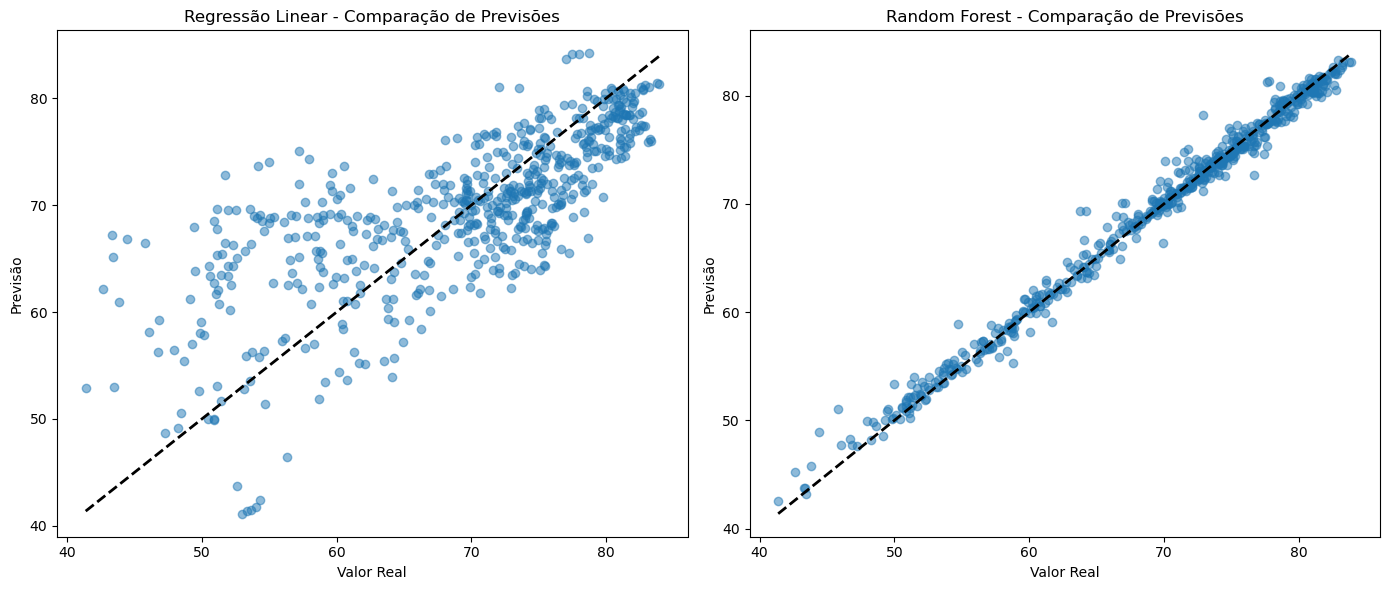

In [5]:
plt.figure(figsize=(14, 6))

# Previsões do modelo de Regressão Linear
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Regressão Linear - Comparação de Previsões')

# Previsões do modelo de Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Random Forest - Comparação de Previsões')

plt.tight_layout()
plt.show()

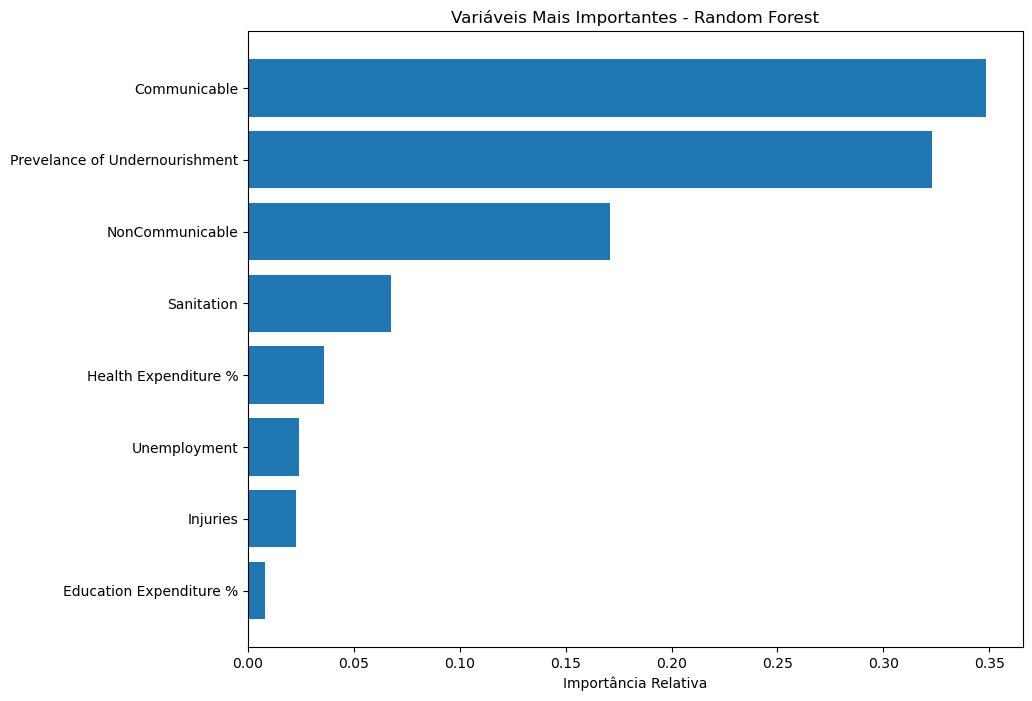

In [6]:
importances = rf_model.feature_importances_
features = X.columns

# Ordenando as importâncias e os nomes das variáveis
indices = np.argsort(importances)[-10:]
sorted_features = features[indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 8))
plt.title('Variáveis Mais Importantes - Random Forest')
plt.barh(range(len(indices)), sorted_importances, align='center')
plt.yticks(range(len(indices)), sorted_features)
plt.xlabel('Importância Relativa')
plt.show()

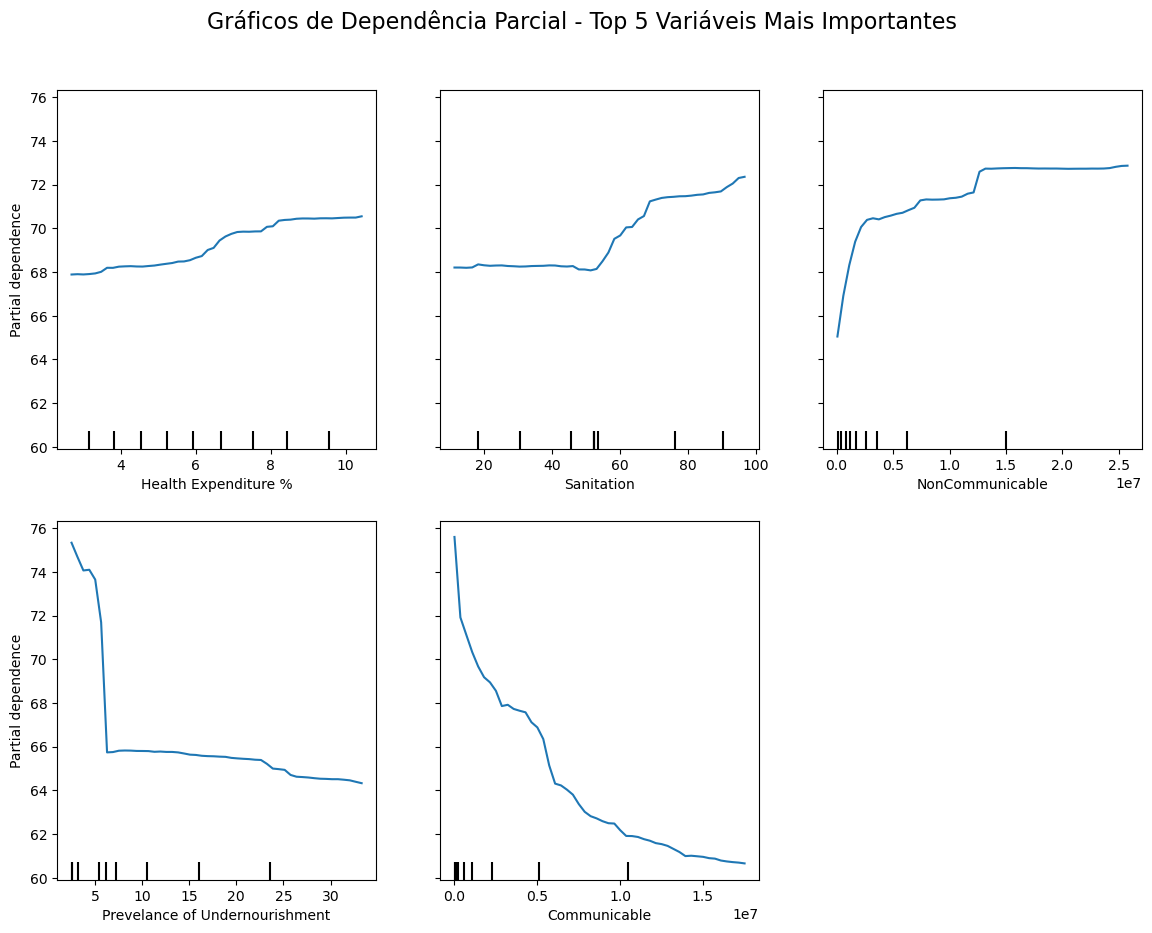

In [7]:
# Plotando os gráficos de dependência parcial para as 5 variáveis mais importantes
top_features = sorted_features[-5:]  # Selecionando as 5 variáveis mais importantes
fig, ax = plt.subplots(figsize=(14, 10))
PartialDependenceDisplay.from_estimator(rf_model, X, features=top_features, grid_resolution=50, ax=ax)
plt.suptitle('Gráficos de Dependência Parcial - Top 5 Variáveis Mais Importantes', fontsize=16)
plt.subplots_adjust(top=0.9)  # Ajusta a posição do título
plt.show()

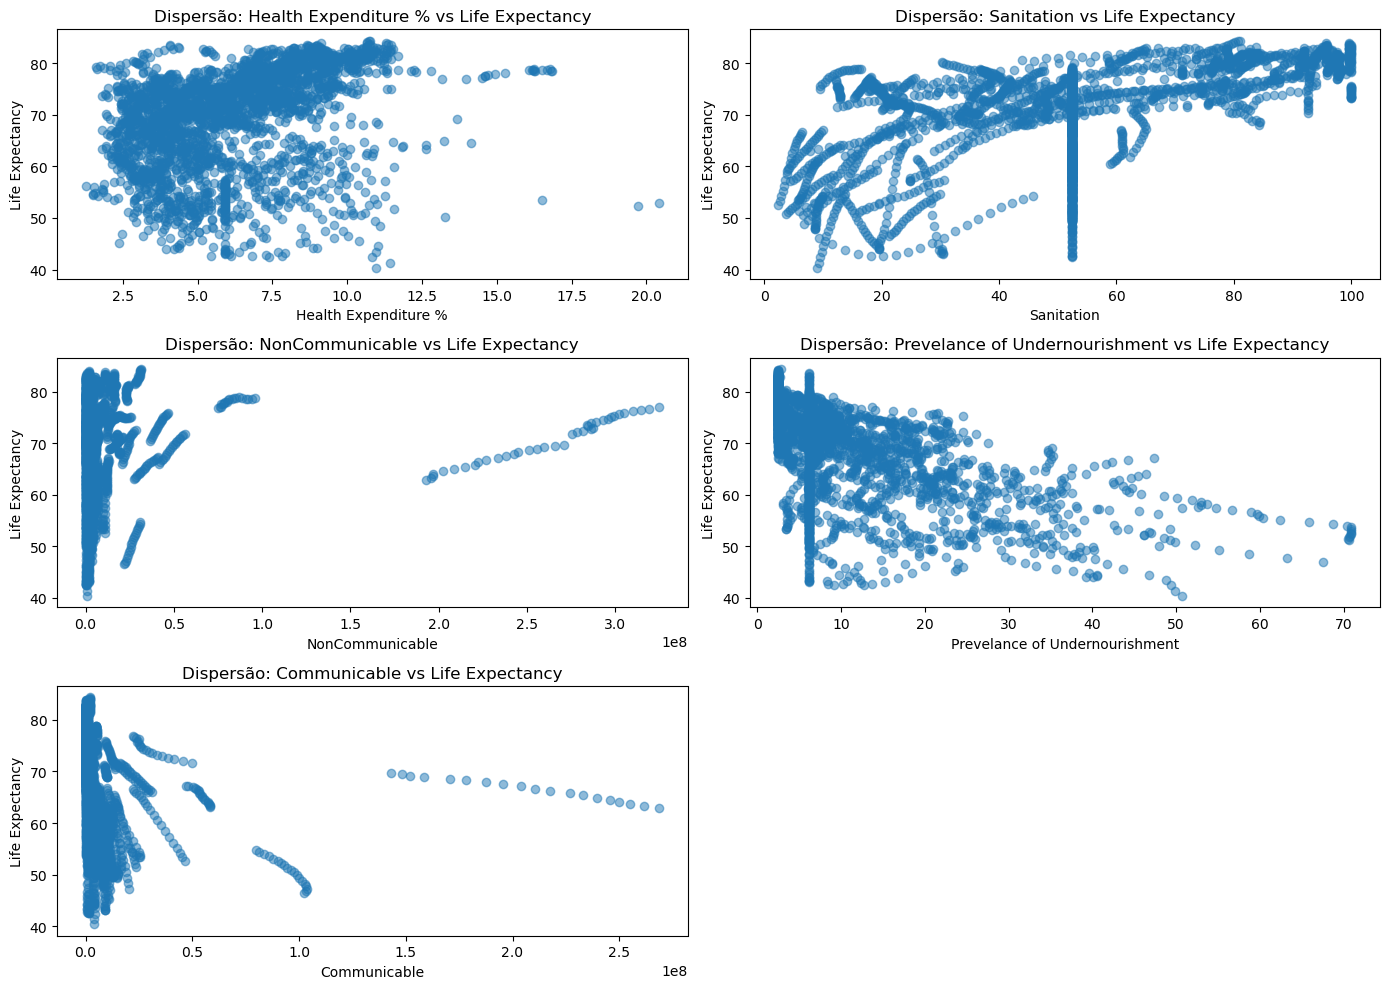

In [8]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_features):
    plt.subplot(3, 2, i + 1)
    plt.scatter(df_clone[feature], df_clone['Life Expectancy World Bank'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')
    plt.title(f'Dispersão: {feature} vs Life Expectancy')

plt.tight_layout()
plt.show()


Correlação entre Expectativa de Vida e Variáveis Importantes:
 Health Expenditure %              0.334481
Sanitation                        0.542604
NonCommunicable                   0.051425
Prevelance of Undernourishment   -0.586525
Communicable                     -0.214274
Name: Life Expectancy World Bank, dtype: float64


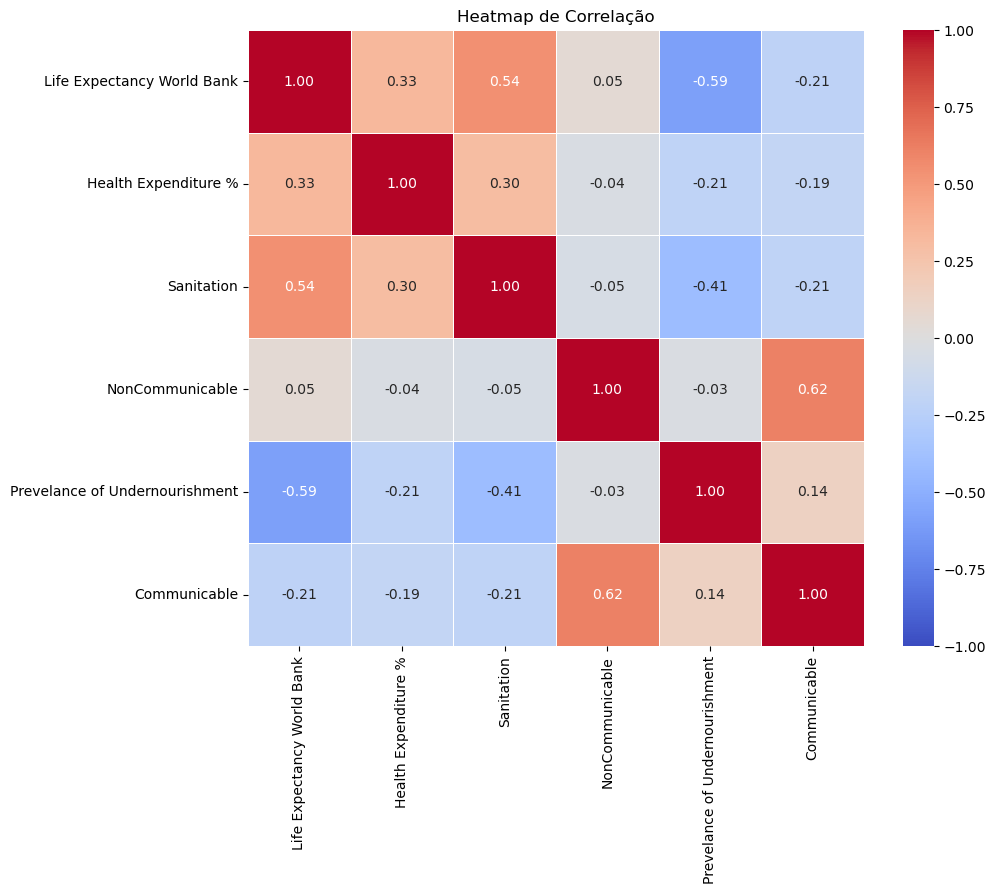

In [9]:
important_features = ['Health Expenditure %', 'Sanitation', 'NonCommunicable', 'Prevelance of Undernourishment', 'Communicable']

correlation_matrix = df_clone[['Life Expectancy World Bank'] + important_features].corr()

correlations = correlation_matrix['Life Expectancy World Bank'][important_features]
print("Correlação entre Expectativa de Vida e Variáveis Importantes:\n", correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            vmin=-1, vmax=1, cbar=True, square=True, linewidths=0.5)
plt.title('Heatmap de Correlação')
plt.show()

In [10]:
correlation_matrix

,Life Expectancy World Bank,Health Expenditure %,Sanitation,NonCommunicable,Prevelance of Undernourishment,Communicable
Life Expectancy World Bank,1.000000,0.334481,0.542604,0.051425,-0.586525,-0.214274
Health Expenditure %,0.334481,1.000000,0.298950,-0.035399,-0.206357,-0.185011
Sanitation,0.542604,0.298950,1.000000,-0.049582,-0.413423,-0.210744
NonCommunicable,0.051425,-0.035399,-0.049582,1.000000,-0.028649,0.616442
Prevelance of Undernourishment,-0.586525,-0.206357,-0.413423,-0.028649,1.000000,0.142987
Communicable,-0.214274,-0.185011,-0.210744,0.616442,0.142987,1.000000


In [11]:
skewness = df_clone.apply(skew)
kurtosis_value = df_clone.apply(kurtosis)

# Imprimindo os resultados
print("Assimetria:")
print(skewness)
print("\nCurtose:")
print(kurtosis_value)

Assimetria:
Life Expectancy World Bank       -0.728037
Prevelance of Undernourishment    2.328288
Health Expenditure %              0.674217
Education Expenditure %           1.147739
Unemployment                      1.639555
Sanitation                        0.100730
Injuries                          7.946943
Communicable                      8.926291
NonCommunicable                   7.741658
dtype: float64

Curtose:
Life Expectancy World Bank        -0.307419
Prevelance of Undernourishment     6.662699
Health Expenditure %               0.801829
Education Expenditure %            3.845425
Unemployment                       2.787886
Sanitation                        -0.444893
Injuries                          66.644386
Communicable                      94.035110
NonCommunicable                   63.956783
dtype: float64


Fazendo a assimetria e curtose de todos os dados, foi possivel observar que os dados mais promissores para apresentar uma curva normal são: "Education Expenditure %" e "Unemployment";

Porque apresentam assimetria proxima de 1 e curtose proxima de 3;

In [12]:
education_expenditure = df_clone['Education Expenditure %']
unemployment = df_clone['Unemployment']

education_expenditure.sort_values()
unemployment.sort_values()

2926     0.100000
2770     0.110000
2571     0.140000
2614     0.140000
2727     0.143000
          ...    
1026    34.930000
870     36.029999
402     36.689999
558     37.160000
714     37.250000
Name: Unemployment, Length: 2964, dtype: float64

In [13]:
education_expenditure.describe()

count    2964.000000
mean        4.464717
std         1.502074
min         0.850320
25%         3.611260
50%         4.396205
75%         4.974292
max        14.059080
Name: Education Expenditure %, dtype: float64

In [14]:
education_expenditure.mode()

0    4.396205
Name: Education Expenditure %, dtype: float64

Média, moda e mediana com valores bem proximos, indicam uma tendencia de distribuição normal.

IQR: 1.363032341003417


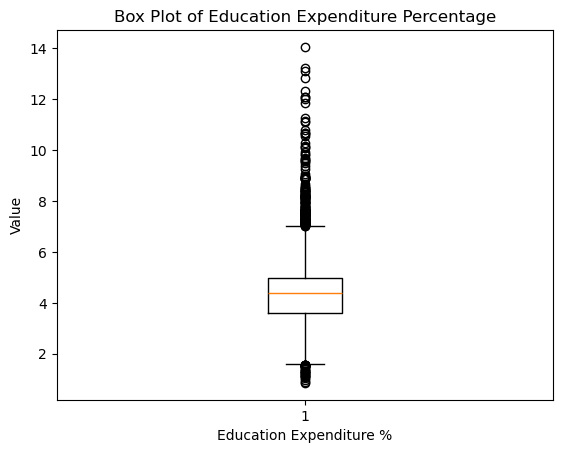

In [15]:
IQR = df['Education Expenditure %'].quantile(0.75) - df['Education Expenditure %'].quantile(0.25)

# Print IQR
print("IQR:", IQR)

# Create box plot to visualize distribution and skewness
plt.boxplot(df['Education Expenditure %'])
plt.xlabel('Education Expenditure %')
plt.ylabel('Value')
plt.title('Box Plot of Education Expenditure Percentage')
plt.show()

In [16]:
unemployment.describe()

count    2964.000000
mean        7.858261
std         6.295597
min         0.100000
25%         3.700750
50%         5.870000
75%        10.022500
max        37.250000
Name: Unemployment, dtype: float64

In [17]:
unemployment.mode()

0    4.0
Name: Unemployment, dtype: float64

In [18]:
quartiles = np.percentile(unemployment, [25, 50, 75, 100])

# Print the quartiles
print("Quartis:", quartiles)

Quartis: [ 3.70074999  5.86999989 10.02250028 37.25      ]


In [19]:
quartiles = np.percentile(education_expenditure, [25, 50, 75, 100])

# Print the quartiles
print("Quartis:", quartiles)

Quartis: [ 3.61126006  4.39620495  4.9742924  14.05908012]


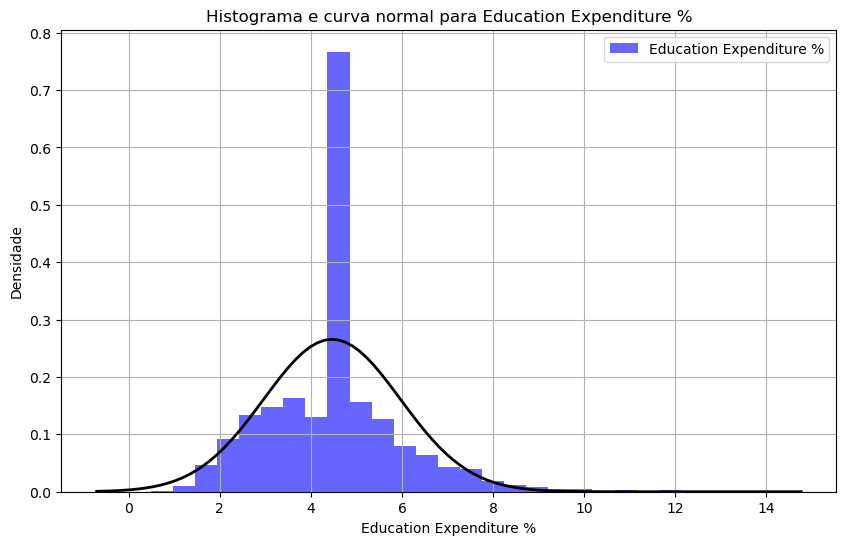

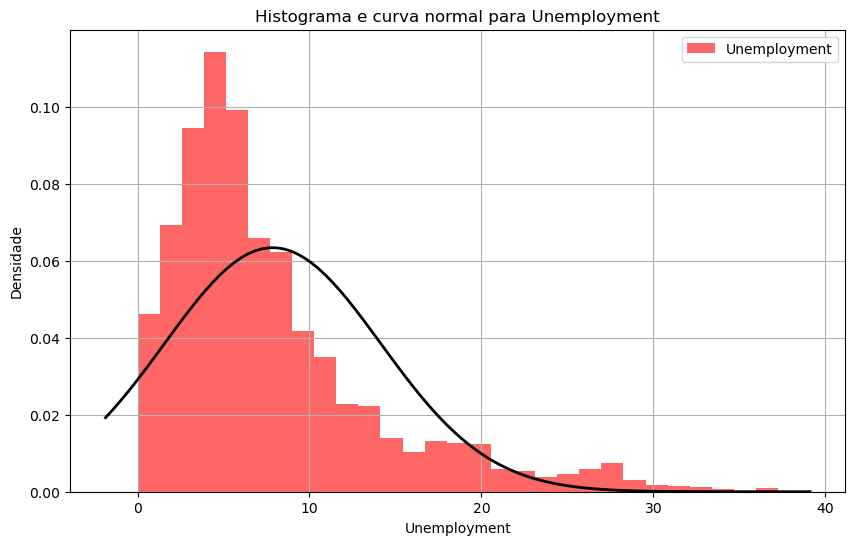

In [24]:
# Definindo os parâmetros para o histograma
bin_edges = np.linspace(0, max(education_expenditure), 30)

# Plotando o histograma e a curva normal para Education Expenditure %
plt.figure(figsize=(10, 6))
plt.hist(education_expenditure, bins=bin_edges, density=True, alpha=0.6, color='b', label='Education Expenditure %')
mu, std = norm.fit(education_expenditure)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma e curva normal para Education Expenditure %')
plt.xlabel('Education Expenditure %')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

# Definindo os parâmetros para o histograma
bin_edges = np.linspace(0, max(unemployment), 30)

# Plotando o histograma e a curva normal para Unemployment
plt.figure(figsize=(10, 6))
plt.hist(unemployment, bins=bin_edges, density=True, alpha=0.6, color='r', label='Unemployment')
mu, std = norm.fit(unemployment)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Histograma e curva normal para Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)

# Exibindo o gráfico
plt.show()

In [23]:
from scipy import stats
shapiro_test_education = stats.shapiro(education_expenditure)
print(f"Shapiro-Wilk test para Education Expenditure %: W={shapiro_test_education[0]}, p-value={shapiro_test_education[1]}")

# Teste de Shapiro-Wilk para Unemployment
shapiro_test_unemployment = stats.shapiro(unemployment)
print(f"Shapiro-Wilk test para Unemployment: W={shapiro_test_unemployment[0]}, p-value={shapiro_test_unemployment[1]}")

Shapiro-Wilk test para Education Expenditure %: W=0.9157829880714417, p-value=8.621113253769998e-38
Shapiro-Wilk test para Unemployment: W=0.8442951440811157, p-value=0.0
